In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [22]:
df = pd.read_csv('test.csv')
df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [23]:
print(df.shape)

(2947, 563)


In [24]:
print(list(df.columns))

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['number']))
labels = list(df.columns)
labels.remove('Activity')

scaled_df = pd.DataFrame(scaled_data, columns=labels)
scaled_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,-0.277708,-0.210631,2.193076,-0.787267,-0.833212,-0.093444,-0.808091,-0.839013,-0.104178,-0.824746,...,-0.166391,-0.344765,0.003566,0.357573,-1.363900,0.575487,-0.404790,0.622723,-0.038348,-1.580825
1,0.198660,0.182591,-0.250264,-0.876984,-0.929061,-0.858050,-0.897145,-0.928949,-0.863269,-0.824746,...,0.491021,0.012257,-0.264092,0.030787,-0.747232,1.871192,-0.361739,0.636731,-0.145709,-1.580825
2,0.024587,-0.318055,-0.228485,-0.921598,-0.934054,-0.907107,-0.916891,-0.933813,-0.912639,-0.910982,...,0.274821,-0.134989,-0.119671,0.446072,0.037919,0.323938,-0.370932,0.632845,-0.126855,-1.580825
3,-0.061057,-0.573037,-0.213709,-0.923837,-0.940817,-0.919082,-0.919152,-0.941599,-0.927776,-0.909740,...,-0.210678,-0.441714,-0.066443,0.338512,0.472695,0.625874,-0.363434,0.645276,-0.117585,-1.580825
4,0.013823,-0.387881,-0.494639,-0.921679,-0.929036,-0.949979,-0.916133,-0.923846,-0.951396,-0.909740,...,-0.810527,-0.796939,-0.022276,-0.098529,1.097348,-0.201999,-0.350256,0.665657,-0.104118,-1.580825


In [26]:
pca = PCA()
pca_data = pca.fit_transform(scaled_df)

pc_list = []
for i in range(len(list(df.columns))-1):
    pc_list.append("PC"+str(i+1))

pca_df = pd.DataFrame(pca_data,columns=pc_list)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC553,PC554,PC555,PC556,PC557,PC558,PC559,PC560,PC561,PC562
0,-10.885514,-2.516958,-0.173092,-1.062760,-3.312765,-4.144864,2.324413,3.028779,1.533106,4.499285,...,-1.073241e-15,2.703898e-16,6.476694e-16,4.523658e-16,-1.430698e-16,-6.873849e-16,-2.997003e-16,-2.387890e-15,1.287999e-15,3.989154e-16
1,-14.132175,-1.361279,0.878439,2.721537,-2.749450,-1.042113,2.336745,-2.103121,1.984050,1.122743,...,6.676328e-16,-8.294005e-16,-4.048923e-16,1.757450e-16,-5.795347e-16,-2.606493e-15,7.360277e-16,-8.759241e-17,-1.262601e-15,6.387586e-16
2,-15.411709,1.992661,-0.733361,2.273674,-2.719176,-0.819126,-0.075339,2.515839,-2.038100,-0.474992,...,1.103592e-16,2.071365e-15,-3.613257e-17,-7.051070e-16,2.670548e-15,3.065722e-15,1.738754e-15,6.306841e-16,-1.131301e-16,-1.347740e-15
3,-15.673719,1.309248,-0.089843,2.300920,-3.713637,-1.112996,-1.100231,1.106807,-1.141428,-1.237448,...,-1.110995e-15,7.676867e-16,-6.978169e-16,-2.344270e-16,-1.751533e-15,1.730417e-15,-1.117251e-15,1.182289e-15,6.307582e-16,1.231342e-17
4,-14.882018,-2.341210,0.917825,3.012674,-2.038496,-1.451190,0.004362,-2.001978,-2.442663,0.068060,...,1.086225e-15,9.838240e-16,-4.354489e-16,-6.643483e-16,8.587572e-16,1.687170e-16,-2.127870e-16,-1.725109e-15,1.144001e-15,6.269344e-16


In [27]:
print(pca.explained_variance_ratio_)

[5.12928799e-01 5.40762601e-02 2.61400661e-02 2.30484728e-02
 1.92879008e-02 1.86408767e-02 1.41384172e-02 1.17582793e-02
 1.04633078e-02 9.48836624e-03 9.08696239e-03 8.18386584e-03
 7.61440700e-03 7.17023915e-03 7.11914717e-03 6.60035431e-03
 6.24765543e-03 6.16446883e-03 5.90653277e-03 5.76080233e-03
 5.48096370e-03 5.37650372e-03 5.06826026e-03 4.87458265e-03
 4.75615103e-03 4.55038853e-03 4.47996292e-03 4.28339620e-03
 4.15228307e-03 4.05615654e-03 3.86867280e-03 3.75808760e-03
 3.64856578e-03 3.58951794e-03 3.44352500e-03 3.29480979e-03
 3.19880884e-03 3.16832982e-03 3.13474119e-03 3.03583346e-03
 2.99790535e-03 2.82019718e-03 2.75921885e-03 2.68598868e-03
 2.65252108e-03 2.59126842e-03 2.50404134e-03 2.44302951e-03
 2.37449200e-03 2.33913093e-03 2.27674939e-03 2.22359715e-03
 2.16970723e-03 2.14922290e-03 2.09662474e-03 2.04520980e-03
 2.00950619e-03 1.99681501e-03 1.94633486e-03 1.92863749e-03
 1.85913936e-03 1.80881035e-03 1.77356209e-03 1.75306626e-03
 1.73628809e-03 1.713011

In [28]:
print("\nExplained Variance (Eigen values):")
print(pca.explained_variance_)
print("\nPrincipal Axes (components/Eigen Vectors):")
print(pca.components_)
print("\nMean of each feature before transformation:")
print(pca.mean_)



Explained Variance (Eigen values):
[2.88363835e+02 3.04011742e+01 1.46957038e+01 1.29576386e+01
 1.08434797e+01 1.04797288e+01 7.94848759e+00 6.61039605e+00
 5.88237502e+00 5.33427189e+00 5.10860635e+00 4.60089382e+00
 4.28074931e+00 4.03104225e+00 4.00231881e+00 3.71065825e+00
 3.51237420e+00 3.46560746e+00 3.32059819e+00 3.23866988e+00
 3.08134718e+00 3.02262075e+00 2.84932912e+00 2.74044536e+00
 2.67386420e+00 2.55818642e+00 2.51859379e+00 2.40808580e+00
 2.33437521e+00 2.28033376e+00 2.17493213e+00 2.11276215e+00
 2.05118999e+00 2.01799384e+00 1.93591796e+00 1.85231165e+00
 1.79834080e+00 1.78120577e+00 1.76232256e+00 1.70671754e+00
 1.68539471e+00 1.58548882e+00 1.55120736e+00 1.51003804e+00
 1.49122286e+00 1.45678718e+00 1.40774892e+00 1.37344863e+00
 1.33491748e+00 1.31503781e+00 1.27996749e+00 1.25008579e+00
 1.21978937e+00 1.20827327e+00 1.17870307e+00 1.14979807e+00
 1.12972583e+00 1.12259096e+00 1.09421149e+00 1.08426219e+00
 1.04519098e+00 1.01689648e+00 9.97080230e-01 9.8

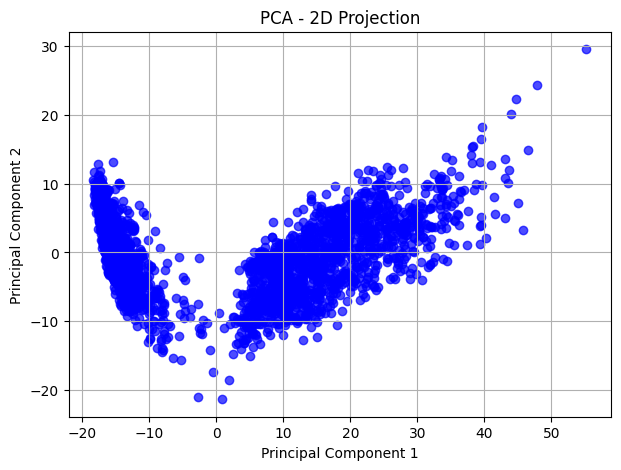

In [29]:
plt.figure(figsize=(7, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.grid(True)
plt.show()

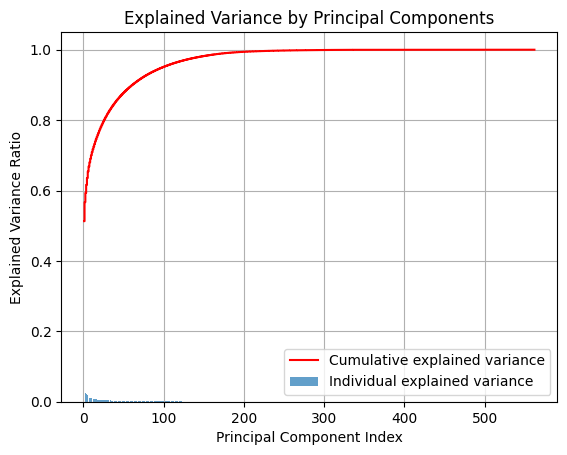

In [31]:
explained_var = pca.explained_variance_ratio_

plt.figure()
plt.bar(range(1,563), explained_var, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1,563), np.cumsum(explained_var), where='mid', label='Cumulative explained variance', 
color='red')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#To retain 95% of the total variance, 10 components must be considered.

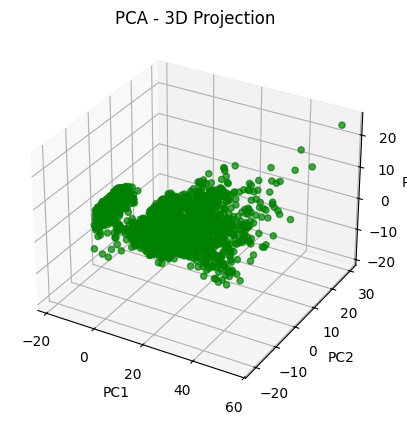

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='green', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - 3D Projection')
plt.show()
